# PI Linear Mastercurve

Fit one PI linear sample; swap files to explore other molecular weights.

**Data:** examples/data/pyRheo/pi_linear/PI_94.9k_T-35.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.models.herschel_bulkley import HerschelBulkley
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)
import arviz as az


INFO:2025-12-06 19:56:12,529:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load PI mastercurve candidate

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'pi_linear'
file = DATA_DIR / 'PI_94.9k_T-35.csv'
df = pd.read_csv(file)
omega = df['Angular Frequency'].to_numpy()
Gp = df['Storage Modulus'].to_numpy()
Gpp = df['Loss Modulus'].to_numpy()
G_star = Gp + 1j*Gpp


## Fit models

In [4]:
gm = GeneralizedMaxwell(n_modes=5, modulus_type='tensile')
gm.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
gm_pred_components = gm.predict(omega)
gm_pred = gm_pred_components[:,0] + 1j*gm_pred_components[:,1]
gm_r2 = r2_complex(G_star, gm_pred)

fm = FractionalMaxwellModel()
fm.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
fm_pred = fm.predict(omega, test_mode='oscillation')
fm_r2 = r2_complex(G_star, fm_pred)

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.186744s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=3.468625e+11 | time=1.187s | final_gradient_norm=4.862264852152328e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.298023s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=3.468625e+11 | time=0.298s | final_gradient_norm=4.862264852152328e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.630973s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=29 | final_cost=4.917669e+11 | time=0.631s | final_gradient_norm=9610047360580700.0


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.634978s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=44 | final_cost=9.698605e+11 | time=0.635s | final_gradient_norm=9620586927671258.0


Element minimization: early termination at n_modes=3 (R²=0.990708 < threshold=0.995015)


Element minimization: reducing from 5 to 4 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.043988s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=45 | final_cost=1.148651e+01 | time=1.044s | final_gradient_norm=0.0017495487180052914


{'gm_r2': 0.9952869470448827, 'fm_r2': -433703357766.2566}


## Plot fits

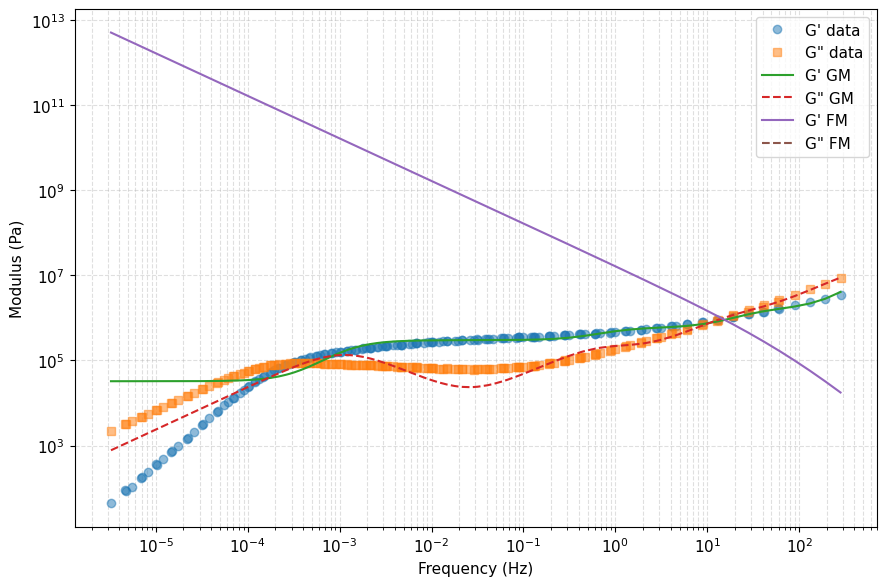

In [5]:
freq_hz = omega/(2*np.pi)
fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(freq_hz, np.real(G_star), 'o', label="G' data", alpha=0.5)
ax.loglog(freq_hz, np.imag(G_star), 's', label='G" data', alpha=0.5)
ax.loglog(freq_hz, np.real(gm_pred), '-', label="G' GM")
ax.loglog(freq_hz, np.imag(gm_pred), '--', label='G" GM')
ax.loglog(freq_hz, np.real(fm_pred), '-', label="G' FM")
ax.loglog(freq_hz, np.imag(fm_pred), '--', label='G" FM')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Modulus (Pa)')
ax.grid(True, which='both', ls='--', alpha=0.4)
ax.legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.541001s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=40 | final_cost=4.917670e+11 | time=0.541s | final_gradient_norm=9.934713482549373e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.313947s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=40 | final_cost=4.917670e+11 | time=0.314s | final_gradient_norm=9.934713482549373e+16


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.293641s


Convergence: reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=44 | final_cost=9.698605e+11 | time=0.294s | final_gradient_norm=9563989905868162.0


Element minimization: early termination at n_modes=3 (R²=0.990708 < threshold=0.992933)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.378258s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=45 | final_cost=1.148651e+01 | time=0.378s | final_gradient_norm=0.0017495487180052914


Model ranking (R²): [('gm', 0.995), ('fm', -433703357766.257)]


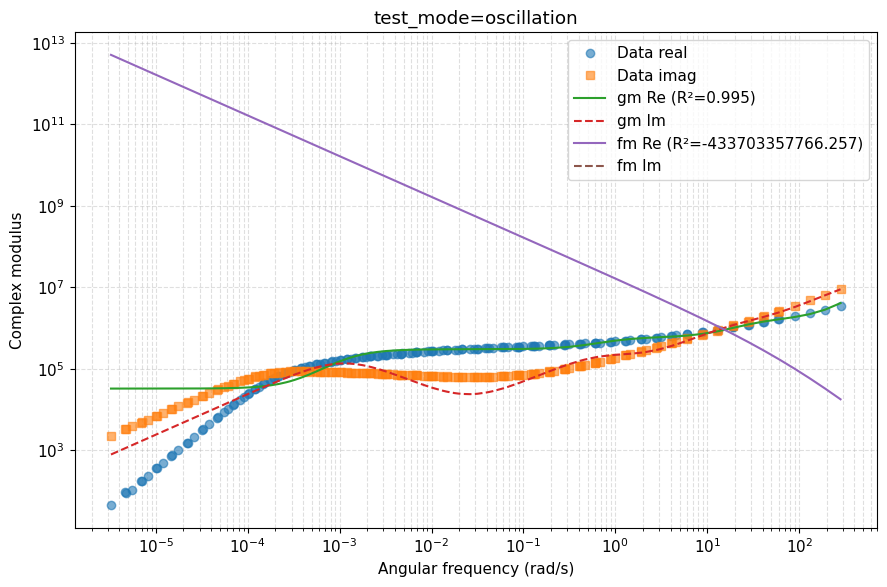

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:00<57:42,  1.15it/s, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   2%|▏         | 86/4000 [00:00<00:32, 120.58it/s, 255 steps of size 1.57e-02. acc. prob=0.76]

warmup:   4%|▍         | 158/4000 [00:01<00:17, 220.79it/s, 63 steps of size 4.96e-02. acc. prob=0.77]

warmup:   6%|▌         | 239/4000 [00:01<00:11, 333.14it/s, 95 steps of size 1.66e-01. acc. prob=0.78]

warmup:   8%|▊         | 312/4000 [00:01<00:08, 417.48it/s, 63 steps of size 5.01e-02. acc. prob=0.78]

warmup:  10%|█         | 401/4000 [00:01<00:06, 527.87it/s, 63 steps of size 1.26e-01. acc. prob=0.78]

warmup:  12%|█▏        | 482/4000 [00:01<00:05, 597.65it/s, 127 steps of size 3.96e-02. acc. prob=0.78]

warmup:  14%|█▍        | 563/4000 [00:01<00:05, 651.44it/s, 63 steps of size 8.51e-02. acc. prob=0.79] 

warmup:  17%|█▋        | 661/4000 [00:01<00:04, 740.90it/s, 15 steps of size 6.54e-02. acc. prob=0.79]

warmup:  19%|█▉        | 765/4000 [00:01<00:03, 823.10it/s, 31 steps of size 1.22e-01. acc. prob=0.79]

warmup:  22%|██▏       | 868/4000 [00:01<00:03, 878.80it/s, 47 steps of size 1.61e-01. acc. prob=0.79]

warmup:  24%|██▍       | 962/4000 [00:01<00:03, 894.01it/s, 383 steps of size 3.42e-02. acc. prob=0.79]

sample:  26%|██▋       | 1056/4000 [00:02<00:03, 820.79it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  29%|██▊       | 1143/4000 [00:02<00:03, 784.77it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  31%|███       | 1225/4000 [00:02<00:03, 762.26it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  33%|███▎      | 1304/4000 [00:02<00:03, 736.03it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  34%|███▍      | 1380/4000 [00:02<00:03, 730.48it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  36%|███▋      | 1455/4000 [00:02<00:03, 732.77it/s, 47 steps of size 6.39e-02. acc. prob=0.95]

sample:  38%|███▊      | 1534/4000 [00:02<00:03, 746.47it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  40%|████      | 1610/4000 [00:02<00:03, 726.25it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  42%|████▏     | 1684/4000 [00:02<00:03, 729.96it/s, 47 steps of size 6.39e-02. acc. prob=0.95]

sample:  44%|████▍     | 1758/4000 [00:03<00:03, 716.31it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  46%|████▌     | 1830/4000 [00:03<00:03, 714.72it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  48%|████▊     | 1902/4000 [00:03<00:02, 712.12it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  49%|████▉     | 1974/4000 [00:03<00:02, 703.17it/s, 63 steps of size 6.39e-02. acc. prob=0.95]

sample:  51%|█████▏    | 2052/4000 [00:03<00:02, 724.18it/s, 47 steps of size 6.39e-02. acc. prob=0.95]

sample:  53%|█████▎    | 2125/4000 [00:03<00:02, 720.09it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  55%|█████▍    | 2198/4000 [00:03<00:02, 707.93it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2273/4000 [00:03<00:02, 719.81it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  59%|█████▊    | 2346/4000 [00:03<00:02, 720.24it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  60%|██████    | 2419/4000 [00:04<00:02, 704.87it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2490/4000 [00:04<00:02, 693.11it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2560/4000 [00:04<00:02, 692.17it/s, 127 steps of size 6.39e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2637/4000 [00:04<00:01, 711.42it/s, 63 steps of size 6.39e-02. acc. prob=0.94] 

sample:  68%|██████▊   | 2712/4000 [00:04<00:01, 722.37it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2785/4000 [00:04<00:01, 711.23it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  71%|███████▏  | 2857/4000 [00:04<00:01, 698.32it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2927/4000 [00:04<00:01, 690.21it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  75%|███████▌  | 3000/4000 [00:04<00:01, 701.29it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3072/4000 [00:04<00:01, 704.69it/s, 127 steps of size 6.39e-02. acc. prob=0.94]

sample:  79%|███████▊  | 3144/4000 [00:05<00:01, 706.73it/s, 63 steps of size 6.39e-02. acc. prob=0.95] 

sample:  80%|████████  | 3215/4000 [00:05<00:01, 705.18it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3287/4000 [00:05<00:01, 706.98it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3358/4000 [00:05<00:00, 705.83it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3432/4000 [00:05<00:00, 715.88it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3504/4000 [00:05<00:00, 713.31it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3576/4000 [00:05<00:00, 629.04it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  91%|█████████ | 3644/4000 [00:05<00:00, 642.01it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3720/4000 [00:05<00:00, 672.29it/s, 95 steps of size 6.39e-02. acc. prob=0.94]

sample:  95%|█████████▍| 3790/4000 [00:06<00:00, 677.71it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample:  96%|█████████▋| 3859/4000 [00:06<00:00, 680.82it/s, 15 steps of size 6.39e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3928/4000 [00:06<00:00, 683.19it/s, 31 steps of size 6.39e-02. acc. prob=0.94]

sample: 100%|█████████▉| 3998/4000 [00:06<00:00, 687.52it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:06<00:00, 633.08it/s, 63 steps of size 6.39e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   2%|▏         | 69/4000 [00:00<00:05, 689.23it/s, 11 steps of size 1.11e-02. acc. prob=0.75]

warmup:   3%|▎         | 139/4000 [00:00<00:05, 689.08it/s, 63 steps of size 1.50e-01. acc. prob=0.78]

warmup:   6%|▌         | 222/4000 [00:00<00:05, 751.98it/s, 31 steps of size 2.38e-01. acc. prob=0.78]

warmup:   7%|▋         | 299/4000 [00:00<00:04, 755.82it/s, 63 steps of size 1.14e-01. acc. prob=0.78]

warmup:  10%|▉         | 383/4000 [00:00<00:04, 782.85it/s, 63 steps of size 1.31e-01. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:00<00:04, 767.81it/s, 31 steps of size 1.53e-01. acc. prob=0.78]

warmup:  13%|█▎        | 539/4000 [00:00<00:04, 718.61it/s, 63 steps of size 1.29e-01. acc. prob=0.79]

warmup:  16%|█▌        | 621/4000 [00:00<00:04, 747.73it/s, 31 steps of size 1.30e-01. acc. prob=0.79]

warmup:  18%|█▊        | 709/4000 [00:00<00:04, 783.58it/s, 63 steps of size 1.08e-01. acc. prob=0.79]

warmup:  20%|█▉        | 798/4000 [00:01<00:03, 813.60it/s, 63 steps of size 9.53e-02. acc. prob=0.79]

warmup:  22%|██▏       | 889/4000 [00:01<00:03, 840.56it/s, 63 steps of size 1.16e-01. acc. prob=0.79]

warmup:  24%|██▍       | 974/4000 [00:01<00:03, 826.89it/s, 63 steps of size 8.60e-02. acc. prob=0.79]

sample:  26%|██▋       | 1058/4000 [00:01<00:03, 829.43it/s, 31 steps of size 8.73e-02. acc. prob=0.89]

sample:  29%|██▊       | 1142/4000 [00:01<00:03, 812.89it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  31%|███       | 1224/4000 [00:01<00:03, 812.16it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  33%|███▎      | 1307/4000 [00:01<00:03, 816.73it/s, 47 steps of size 8.73e-02. acc. prob=0.90]

sample:  35%|███▍      | 1395/4000 [00:01<00:03, 834.05it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  37%|███▋      | 1483/4000 [00:01<00:02, 844.93it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  39%|███▉      | 1568/4000 [00:01<00:02, 836.29it/s, 47 steps of size 8.73e-02. acc. prob=0.91]

sample:  41%|████▏     | 1652/4000 [00:02<00:02, 826.64it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  43%|████▎     | 1735/4000 [00:02<00:02, 809.47it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  45%|████▌     | 1818/4000 [00:02<00:02, 813.19it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  48%|████▊     | 1906/4000 [00:02<00:02, 832.72it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  50%|████▉     | 1990/4000 [00:02<00:02, 830.16it/s, 39 steps of size 8.73e-02. acc. prob=0.90]

sample:  52%|█████▏    | 2079/4000 [00:02<00:02, 846.51it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  54%|█████▍    | 2164/4000 [00:02<00:02, 845.48it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  56%|█████▋    | 2255/4000 [00:02<00:02, 860.34it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  59%|█████▊    | 2342/4000 [00:02<00:01, 860.66it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  61%|██████    | 2429/4000 [00:02<00:01, 861.98it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  63%|██████▎   | 2517/4000 [00:03<00:01, 865.58it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  65%|██████▌   | 2604/4000 [00:03<00:01, 861.66it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  67%|██████▋   | 2691/4000 [00:03<00:01, 860.32it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  70%|██████▉   | 2783/4000 [00:03<00:01, 876.40it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  72%|███████▏  | 2871/4000 [00:03<00:01, 850.52it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  74%|███████▍  | 2957/4000 [00:03<00:01, 834.22it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  76%|███████▌  | 3043/4000 [00:03<00:01, 841.60it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  78%|███████▊  | 3132/4000 [00:03<00:01, 854.74it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  81%|████████  | 3226/4000 [00:03<00:00, 878.67it/s, 15 steps of size 8.73e-02. acc. prob=0.90]

sample:  83%|████████▎ | 3314/4000 [00:04<00:00, 860.25it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  85%|████████▌ | 3401/4000 [00:04<00:00, 851.99it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  87%|████████▋ | 3487/4000 [00:04<00:00, 834.22it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  89%|████████▉ | 3571/4000 [00:04<00:00, 825.79it/s, 127 steps of size 8.73e-02. acc. prob=0.90]

sample:  91%|█████████▏| 3654/4000 [00:04<00:00, 820.58it/s, 63 steps of size 8.73e-02. acc. prob=0.90] 

sample:  93%|█████████▎| 3737/4000 [00:04<00:00, 815.72it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample:  95%|█████████▌| 3819/4000 [00:04<00:00, 815.83it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample:  98%|█████████▊| 3906/4000 [00:04<00:00, 830.79it/s, 31 steps of size 8.73e-02. acc. prob=0.90]

sample: 100%|█████████▉| 3992/4000 [00:04<00:00, 838.86it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 825.76it/s, 63 steps of size 8.73e-02. acc. prob=0.90]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|▏         | 58/4000 [00:00<00:06, 568.40it/s, 255 steps of size 1.56e-02. acc. prob=0.75]

warmup:   3%|▎         | 116/4000 [00:00<00:06, 567.82it/s, 255 steps of size 2.56e-02. acc. prob=0.76]

warmup:   4%|▍         | 173/4000 [00:00<00:07, 533.87it/s, 127 steps of size 8.58e-02. acc. prob=0.77]

warmup:   6%|▌         | 247/4000 [00:00<00:06, 610.44it/s, 127 steps of size 5.84e-02. acc. prob=0.78]

warmup:   8%|▊         | 312/4000 [00:00<00:05, 623.07it/s, 47 steps of size 2.03e-01. acc. prob=0.78] 

warmup:  10%|▉         | 392/4000 [00:00<00:05, 680.38it/s, 63 steps of size 9.18e-02. acc. prob=0.78]

warmup:  12%|█▏        | 480/4000 [00:00<00:04, 742.08it/s, 63 steps of size 1.84e-01. acc. prob=0.78]

warmup:  14%|█▍        | 573/4000 [00:00<00:04, 799.33it/s, 31 steps of size 1.19e-01. acc. prob=0.79]

warmup:  17%|█▋        | 669/4000 [00:00<00:03, 848.62it/s, 63 steps of size 1.03e-01. acc. prob=0.79]

warmup:  19%|█▉        | 769/4000 [00:01<00:03, 892.57it/s, 31 steps of size 1.09e-01. acc. prob=0.79]

warmup:  22%|██▏       | 868/4000 [00:01<00:03, 920.34it/s, 31 steps of size 1.63e-01. acc. prob=0.79]

warmup:  24%|██▍       | 966/4000 [00:01<00:03, 936.70it/s, 31 steps of size 1.80e-01. acc. prob=0.79]

sample:  26%|██▋       | 1060/4000 [00:01<00:03, 845.99it/s, 47 steps of size 7.39e-02. acc. prob=0.95]

sample:  29%|██▊       | 1147/4000 [00:01<00:03, 816.53it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  31%|███       | 1230/4000 [00:01<00:03, 794.86it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  33%|███▎      | 1311/4000 [00:01<00:03, 779.39it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  35%|███▍      | 1393/4000 [00:01<00:03, 788.38it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  37%|███▋      | 1473/4000 [00:01<00:03, 772.10it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  39%|███▉      | 1551/4000 [00:02<00:03, 770.37it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  41%|████      | 1629/4000 [00:02<00:03, 764.01it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  43%|████▎     | 1706/4000 [00:02<00:03, 758.61it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  45%|████▍     | 1784/4000 [00:02<00:02, 761.23it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  47%|████▋     | 1862/4000 [00:02<00:02, 765.08it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  48%|████▊     | 1939/4000 [00:02<00:02, 764.35it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  50%|█████     | 2016/4000 [00:02<00:02, 765.66it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2095/4000 [00:02<00:02, 771.82it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2173/4000 [00:02<00:02, 669.99it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2245/4000 [00:02<00:02, 682.05it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2323/4000 [00:03<00:02, 706.54it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  60%|██████    | 2404/4000 [00:03<00:02, 732.61it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2481/4000 [00:03<00:02, 741.08it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2558/4000 [00:03<00:01, 748.23it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2637/4000 [00:03<00:01, 759.00it/s, 79 steps of size 7.39e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2714/4000 [00:03<00:01, 750.15it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2790/4000 [00:03<00:01, 752.73it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2867/4000 [00:03<00:01, 756.57it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  74%|███████▎  | 2944/4000 [00:03<00:01, 759.65it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3029/4000 [00:03<00:01, 785.62it/s, 31 steps of size 7.39e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3110/4000 [00:04<00:01, 788.92it/s, 127 steps of size 7.39e-02. acc. prob=0.94]

sample:  80%|███████▉  | 3189/4000 [00:04<00:01, 787.34it/s, 63 steps of size 7.39e-02. acc. prob=0.94] 

sample:  82%|████████▏ | 3268/4000 [00:04<00:00, 776.37it/s, 95 steps of size 7.39e-02. acc. prob=0.94]

sample:  84%|████████▎ | 3346/4000 [00:04<00:00, 748.52it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3422/4000 [00:04<00:00, 742.30it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3502/4000 [00:04<00:00, 755.07it/s, 95 steps of size 7.39e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3578/4000 [00:04<00:00, 751.16it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  91%|█████████▏| 3657/4000 [00:04<00:00, 759.03it/s, 127 steps of size 7.39e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3737/4000 [00:04<00:00, 769.95it/s, 63 steps of size 7.39e-02. acc. prob=0.94] 

sample:  95%|█████████▌| 3817/4000 [00:05<00:00, 778.12it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3895/4000 [00:05<00:00, 764.53it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3972/4000 [00:05<00:00, 762.78it/s, 63 steps of size 7.39e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 759.90it/s, 47 steps of size 7.39e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   2%|▏         | 77/4000 [00:00<00:05, 755.92it/s, 191 steps of size 2.10e-02. acc. prob=0.76]

warmup:   4%|▍         | 158/4000 [00:00<00:04, 783.55it/s, 63 steps of size 1.21e-01. acc. prob=0.77]

warmup:   6%|▌         | 237/4000 [00:00<00:05, 688.87it/s, 63 steps of size 1.14e-01. acc. prob=0.78]

warmup:   8%|▊         | 308/4000 [00:00<00:05, 645.12it/s, 63 steps of size 1.34e-01. acc. prob=0.78]

warmup:   9%|▉         | 378/4000 [00:00<00:05, 660.02it/s, 63 steps of size 5.62e-02. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:00<00:04, 711.33it/s, 127 steps of size 9.03e-02. acc. prob=0.78]

warmup:  13%|█▎        | 538/4000 [00:00<00:04, 723.67it/s, 63 steps of size 1.09e-01. acc. prob=0.79] 

warmup:  16%|█▌        | 625/4000 [00:00<00:04, 767.38it/s, 63 steps of size 9.28e-02. acc. prob=0.79]

warmup:  18%|█▊        | 725/4000 [00:00<00:03, 837.14it/s, 63 steps of size 1.07e-01. acc. prob=0.79]

warmup:  21%|██        | 822/4000 [00:01<00:03, 874.17it/s, 63 steps of size 7.93e-02. acc. prob=0.79]

warmup:  23%|██▎       | 912/4000 [00:01<00:03, 881.51it/s, 63 steps of size 1.29e-01. acc. prob=0.79]

sample:  25%|██▌       | 1001/4000 [00:01<00:03, 795.13it/s, 31 steps of size 6.32e-02. acc. prob=0.96]

sample:  27%|██▋       | 1083/4000 [00:01<00:03, 761.42it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  29%|██▉       | 1161/4000 [00:01<00:03, 748.80it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  31%|███       | 1237/4000 [00:01<00:03, 729.83it/s, 95 steps of size 6.32e-02. acc. prob=0.93]

sample:  33%|███▎      | 1311/4000 [00:01<00:03, 725.67it/s, 47 steps of size 6.32e-02. acc. prob=0.93]

sample:  35%|███▍      | 1384/4000 [00:01<00:03, 722.35it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  36%|███▋      | 1457/4000 [00:01<00:03, 721.67it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  38%|███▊      | 1532/4000 [00:02<00:03, 728.84it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  40%|████      | 1606/4000 [00:02<00:03, 731.28it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  42%|████▏     | 1680/4000 [00:02<00:03, 728.11it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  44%|████▍     | 1758/4000 [00:02<00:03, 740.19it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  46%|████▌     | 1833/4000 [00:02<00:02, 738.68it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  48%|████▊     | 1911/4000 [00:02<00:02, 748.90it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  50%|████▉     | 1986/4000 [00:02<00:02, 706.17it/s, 127 steps of size 6.32e-02. acc. prob=0.93]

sample:  51%|█████▏    | 2058/4000 [00:02<00:02, 700.02it/s, 63 steps of size 6.32e-02. acc. prob=0.93] 

sample:  53%|█████▎    | 2129/4000 [00:02<00:02, 674.69it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  55%|█████▌    | 2204/4000 [00:02<00:02, 694.61it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  57%|█████▋    | 2283/4000 [00:03<00:02, 720.92it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  59%|█████▉    | 2357/4000 [00:03<00:02, 725.01it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  61%|██████    | 2430/4000 [00:03<00:02, 719.51it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  63%|██████▎   | 2503/4000 [00:03<00:02, 713.99it/s, 127 steps of size 6.32e-02. acc. prob=0.93]

sample:  64%|██████▍   | 2579/4000 [00:03<00:01, 725.12it/s, 63 steps of size 6.32e-02. acc. prob=0.93] 

sample:  66%|██████▋   | 2652/4000 [00:03<00:01, 721.96it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  68%|██████▊   | 2726/4000 [00:03<00:01, 724.85it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  70%|███████   | 2800/4000 [00:03<00:01, 728.84it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  72%|███████▏  | 2873/4000 [00:03<00:01, 717.23it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  74%|███████▎  | 2945/4000 [00:04<00:01, 700.79it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  75%|███████▌  | 3016/4000 [00:04<00:01, 700.91it/s, 95 steps of size 6.32e-02. acc. prob=0.93]

sample:  77%|███████▋  | 3089/4000 [00:04<00:01, 709.12it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  79%|███████▉  | 3166/4000 [00:04<00:01, 726.48it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  81%|████████  | 3239/4000 [00:04<00:01, 702.37it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  83%|████████▎ | 3313/4000 [00:04<00:00, 710.61it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  85%|████████▍ | 3385/4000 [00:04<00:00, 709.71it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  86%|████████▋ | 3457/4000 [00:04<00:00, 708.71it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  88%|████████▊ | 3528/4000 [00:04<00:00, 705.18it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  90%|████████▉ | 3599/4000 [00:04<00:00, 699.79it/s, 31 steps of size 6.32e-02. acc. prob=0.93]

sample:  92%|█████████▏| 3670/4000 [00:05<00:00, 702.01it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  94%|█████████▎| 3741/4000 [00:05<00:00, 698.31it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  95%|█████████▌| 3811/4000 [00:05<00:00, 698.17it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  97%|█████████▋| 3888/4000 [00:05<00:00, 719.09it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample:  99%|█████████▉| 3960/4000 [00:05<00:00, 714.96it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 725.65it/s, 63 steps of size 6.32e-02. acc. prob=0.93]

/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='E_2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='tau_1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='tau_2'>, <Axes: xlabel='E_2'>,
        <Axes: xlabel='E_3'>, <Axes: xlabel='E_4'>,
        <Axes: xlabel='E_inf'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>, <

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (44) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_2\n0'}>,
        <Axes: title={'center': 'E_2\n1'}>,
        <Axes: title={'center': 'E_2\n2'}>,
        <Axes: title={'center': 'E_2\n3'}>],
       [<Axes: title={'center': 'E_3\n0'}>,
        <Axes: title={'center': 'E_3\n1'}>,
        <Axes: title={'center': 'E_3\n2'}>,
        <Axes: title={'center': 'E_3\n3'}>],
       [<Axes: title={'center': 'E_4\n0'}>,
        <Axes: title={'center': 'E_4\n1'}>,
        <Axes: title={'center': 'E_4\n2'}>,
        <Axes: title={'center': 'E_4\n3'}>],
       [<Axes: title={'center': 'E_inf\n0'}>,
        <Axes: title={'center': 'E_inf\n1'}>,
        <Axes: title={'center': 'E_inf\n2'}>,
        <Axes: title={'center': 'E_inf\n3'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_imag\n1'}>,
     

array([[<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_3'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'E_4'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'tau_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_4'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: >]], dtype=object)

array([[<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_3'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'E_4'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'tau_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_4'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: >

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics
import arviz as az

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
